## 读取图像

In [5]:
import cv2
import numpy as np 
image = cv2.imread('./test.png')
image.shape

libpng warning: iCCP: known incorrect sRGB profile


(1024, 1024, 3)

## Mipmap处理

(1024, 1024, 3)


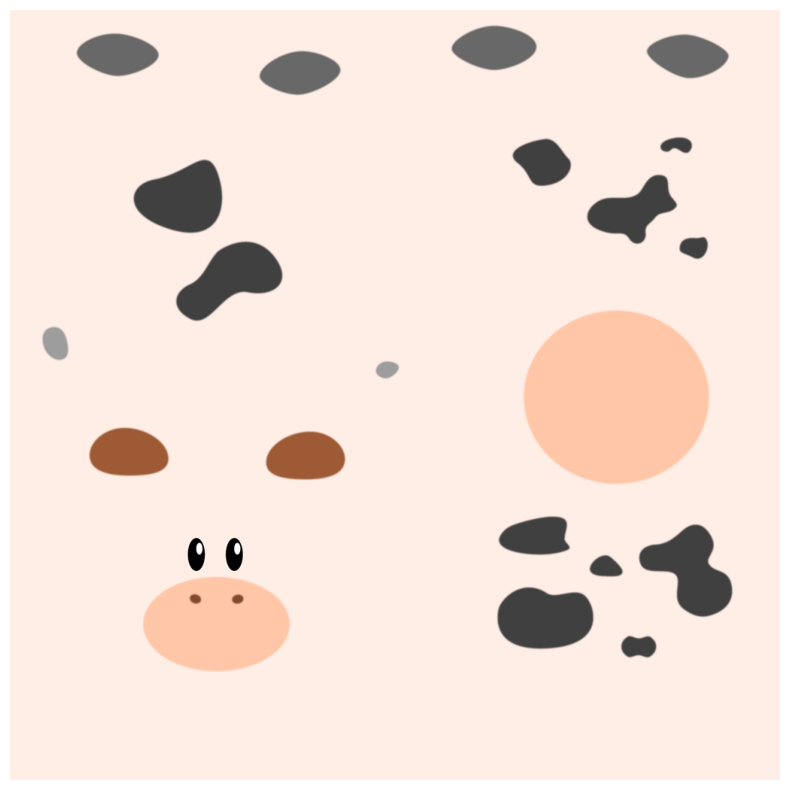

(512, 512, 3)


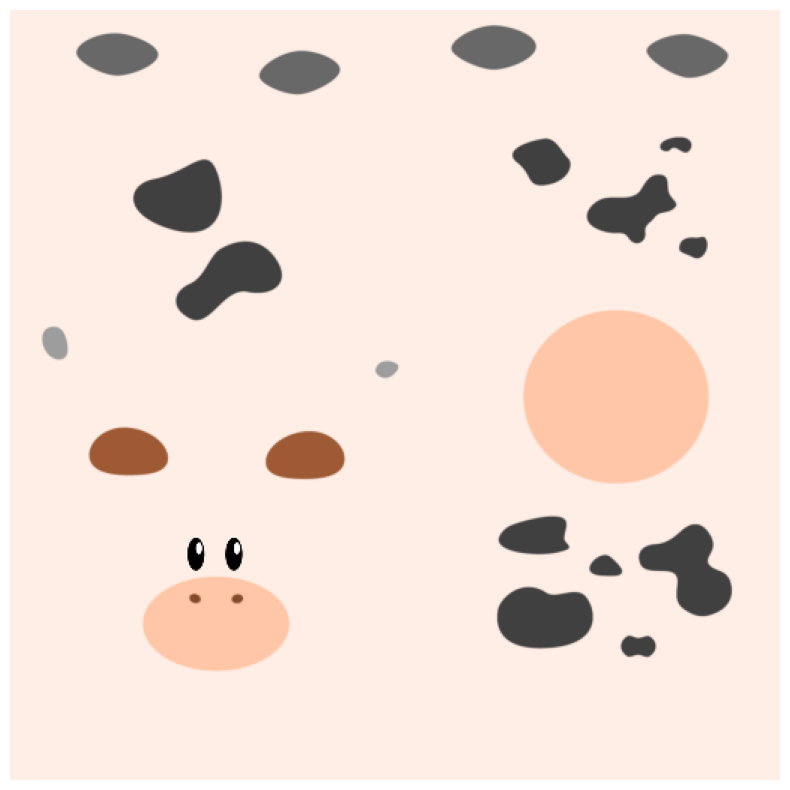

(256, 256, 3)


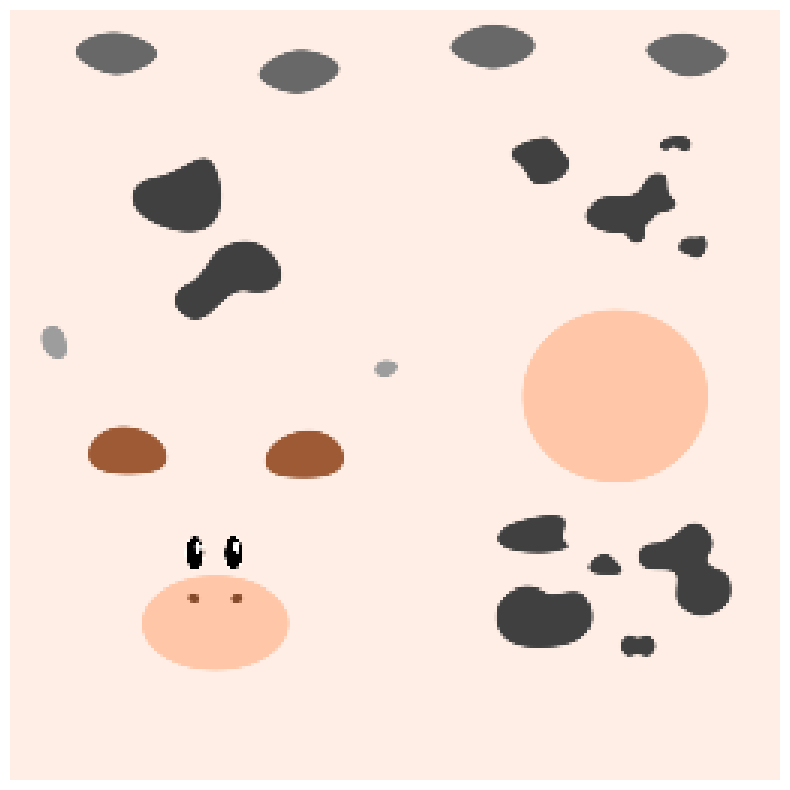

(128, 128, 3)


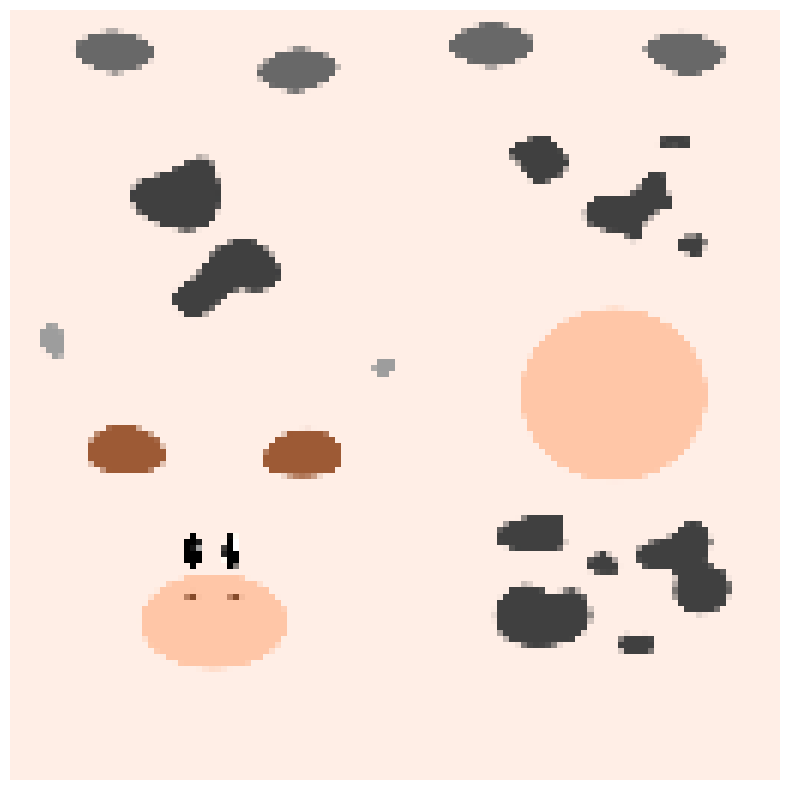

(64, 64, 3)


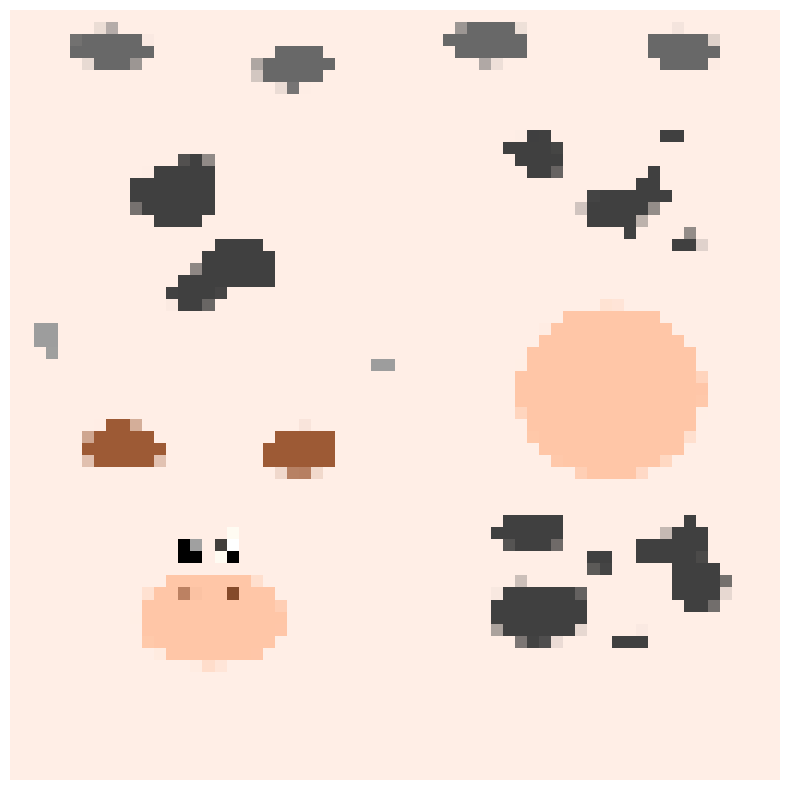

(32, 32, 3)


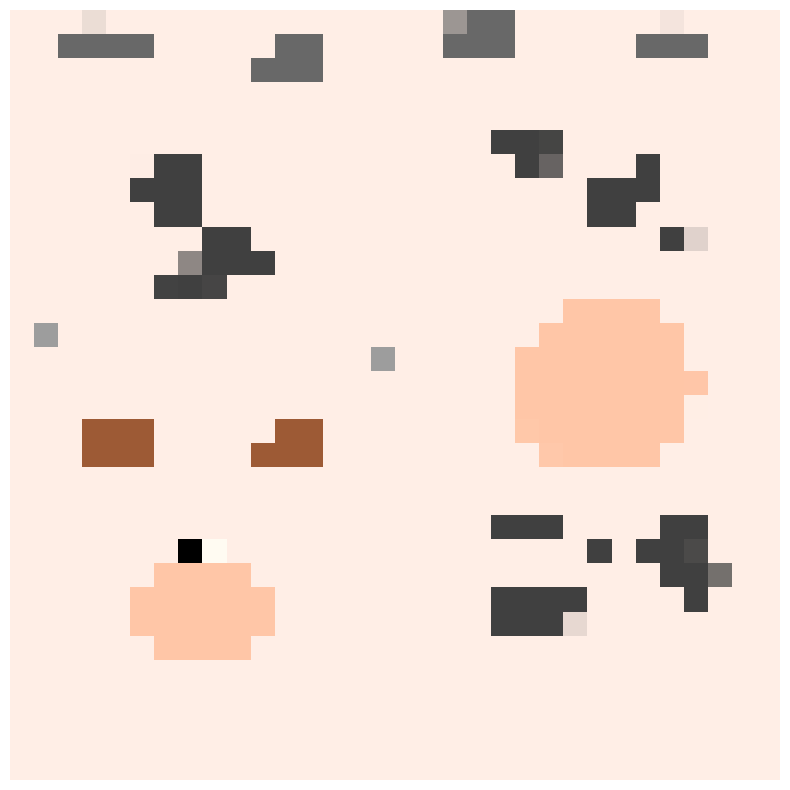

(16, 16, 3)


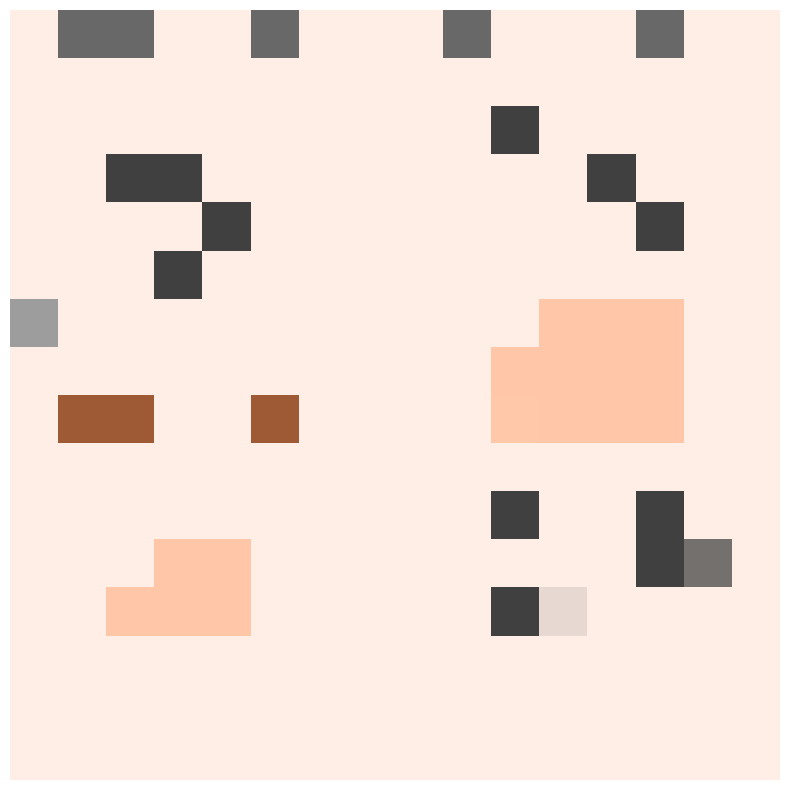

(8, 8, 3)


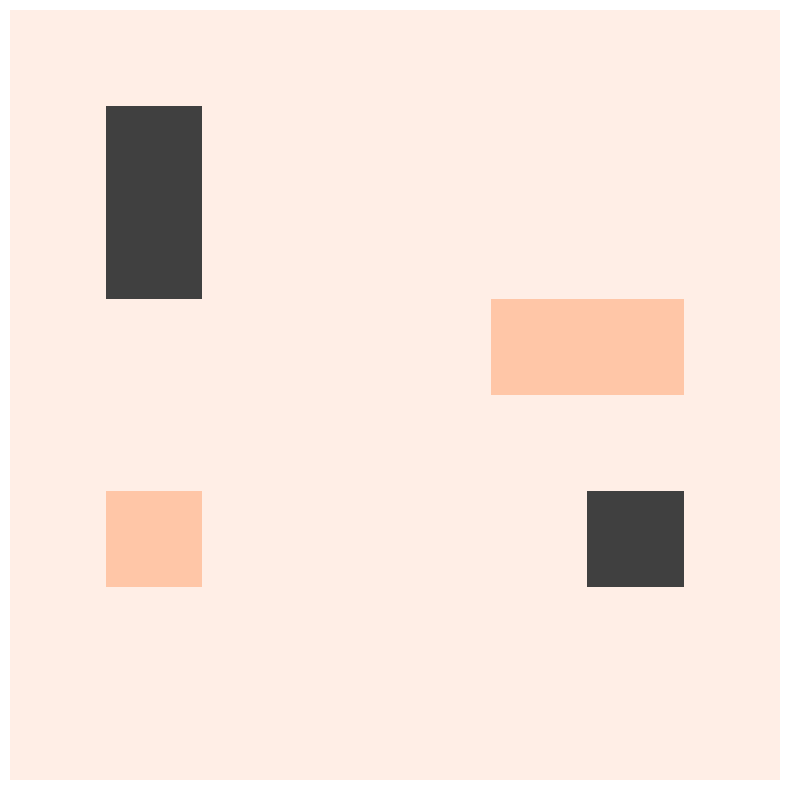

(4, 4, 3)


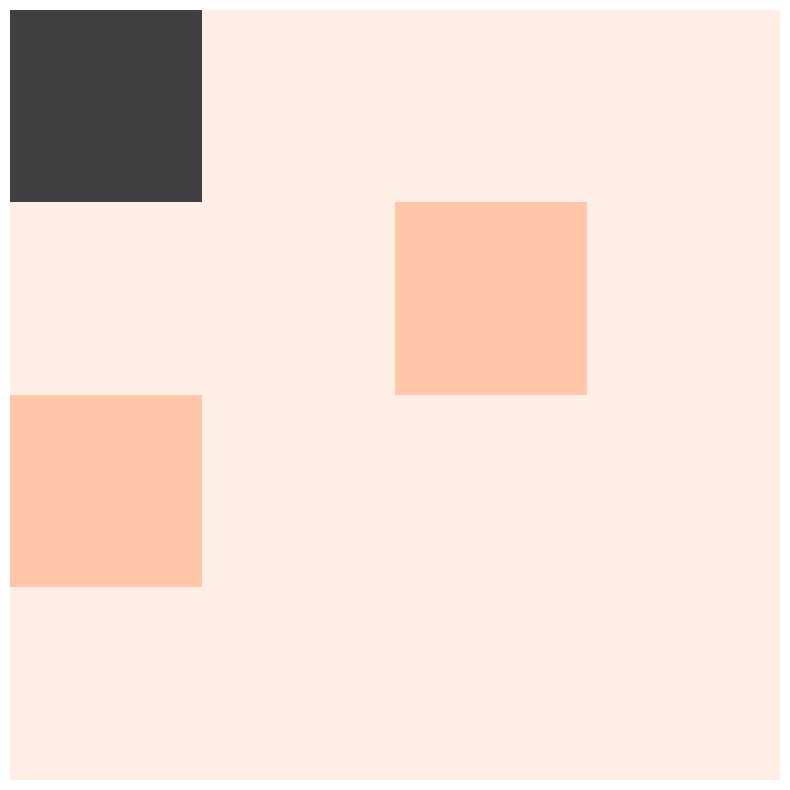

(2, 2, 3)


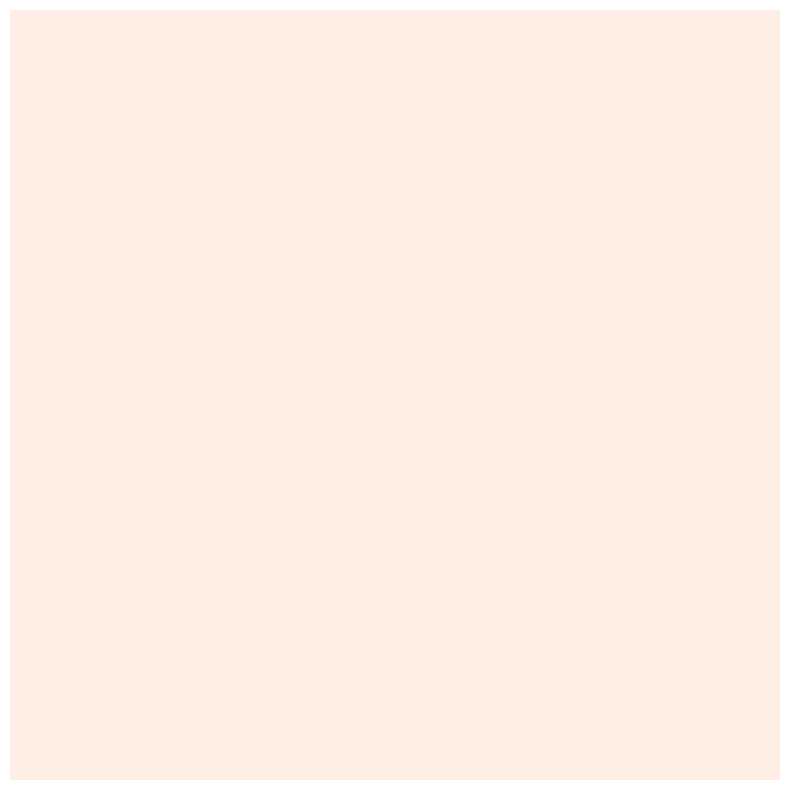

(1, 1, 3)


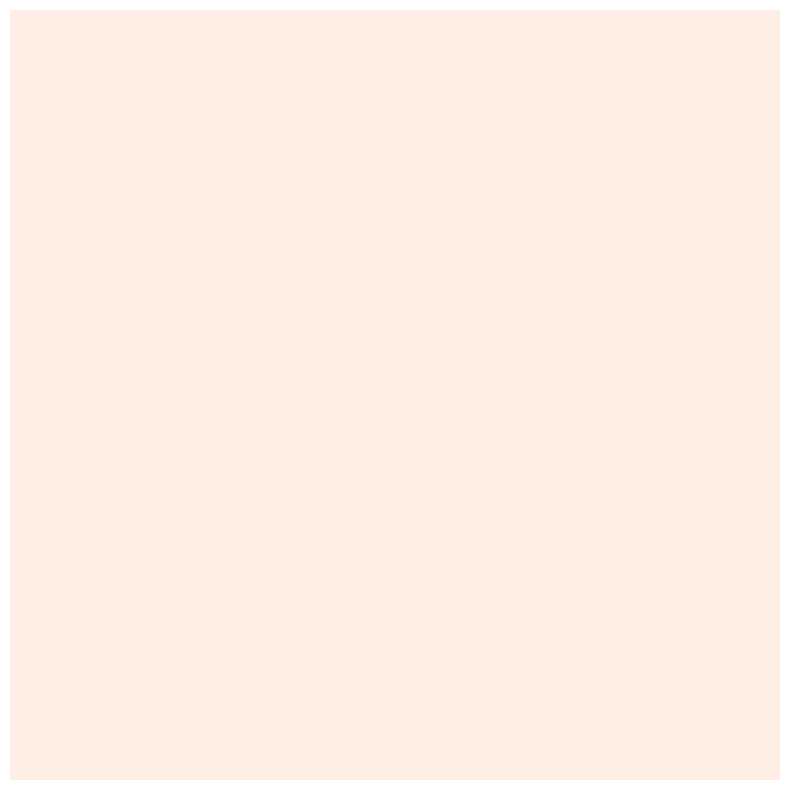

In [6]:
import math 
import matplotlib.pyplot as plt
def bilinear_interpolation(image: np.ndarray,row,col) -> tuple:
    """双线性插值函数"""
    col0, row0 = col, row
    col1, row1 = col0 + 1, row0 + 1
    # 获取四个邻近像素点的值
    q00 = image[row0, col0]
    q10 = image[row0, col1]
    q01 = image[row1, col0]
    q11 = image[row1, col1]
    # 计算权重
    wa = (col1 - col) / (col1 - col0)
    wb = (row1 - row) / (row1 - row0)
    # 双线性插值计算
    return (q00 * (1 - wa) * (1 - wb) + q10 * wa * (1 - wb) +
            q01 * (1 - wa) * wb + q11 * wa * wb)
def mipmap(image: np.ndarray):
    ori_weight, ori_height, piles = image.shape
    fin_weight, fin_height = ori_weight // 2, ori_height // 2
    fin_image = np.zeros((fin_weight, fin_height, piles))
    for row in range(fin_height):
        for col in range(fin_weight):
            fin_image[row][col]=bilinear_interpolation(image,2*row,2*col)
    return fin_image
def show_save_img(img):
    print(img.shape)
    img=img.astype(np.uint8)
    cv2.imwrite('./mipmap_imgs/'+str(img.shape[0])+'.png', img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
pow=int(math.log2(1024))
img=image
img_list=[]
for i in range(pow+1):
    show_save_img(img)
    img_list.append(img)
    img=mipmap(img)